# Volcanic Bomb Activity

We consider a model for the trajectory of a volcanic bomb with the following equations:
$$ \frac{dx}{dt} = v_x$$
$$ \frac{dz}{dt} = v_z$$
$$ \frac{dv_x}{dt} = -\frac{\alpha}{m} v_x$$
$$ \frac{dv_z}{dt} = -g - \frac{\alpha}{m} v_z$$

and the following initial conditions:
$$ x(t=0) = 0$$
$$ z(t=0) = 2000$$ m
$$ v_x(t=0) = 100 m/s$$
$$ v_z(t=0) = 30 m/s$$

and these parameters  
$\frac{\alpha}{m} = 0.1$ s$^{-1}$  
$g = 9.8$ m s$^{-2}$

## Import Packages 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [3]:
alphaoverm = 0.1
g = 9.8

## Time steps

In [4]:
dt = 0.1
nt = 10000

## Pre-allocation

In [5]:
x = np.zeros(nt)
z = np.zeros(nt)
vx = np.zeros(nt)
vz = np.zeros(nt)

## Initial Conditions

In [6]:
x[0] = 0.
z[0] = 2000.
vx[0] = 100.
vz[0] = 30.

## Function definitions

In [10]:
fx = lambda vx: vx #RHS of dx/dt
fz = lambda vz: vz #RHS of dz/dt
fvx = lambda vx: -alphaoverm*vx #RHS of dv_x/dt
fvz = lambda vz: -g - alphaoverm*vz #RHS of dv_x/dt

## Run Model (Predictor-Corrector)

In [12]:
for i in np.arange(0,nt-1):
    k1_x = fx(vx[i])
    k1_z = fz(vz[i])
    k1_vx = fvx(vx[i])
    k1_vz = fvz(vz[i])
    
    k2_x = fx(vx[i]+k1_vx*dt)
    k2_z = fz(vz[i]+k1_vz*dt)
    k2_vx = fvx(vx[i]+k1_vx*dt)
    k2_vz = fvz(vz[i]+k1_vz*dt)
    
    x[i+1] = x[i] + (k1_x+k2_x)*dt/2
    z[i+1] = z[i] + (k1_z+k2_z)*dt/2
    vx[i+1] = vx[i] + (k1_vx+k2_vx)*dt/2
    vz[i+1] = vz[i] + (k1_vz+k2_vz)*dt/2

## Plot Output

Text(0, 0.5, 'z')

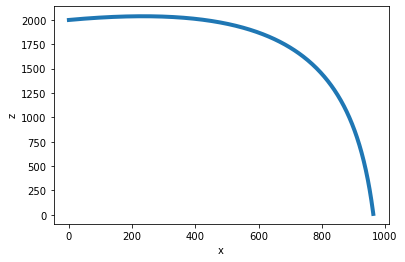

In [17]:
zair = z > 0
plt.plot(x[zair],z[zair],linewidth=4)
plt.xlabel('x')
plt.ylabel('z')